# Breast cancer detection (ML models): a comparative study

Scientists and researchers use machine learning models for diagnostcs purpose in the field of medicine. Here I have analysed breast cancer data from Wisconsin (1995). With the given data I have generated ML models that predicts whether the cancer is benign or malignant. I have used algorithms mentioned below to create models and I performs an comparison study based on the models accuracies.                                                                                                     
       1.Gradient boosting                                                                            
       2.Logistic regression                                                                                    
       3.Random forest                                                                                    
       4.Support vector machine                                                                               
       5.Multilayer perceptron 

In [77]:
#Import libraries 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error,confusion_matrix,mean_squared_error,accuracy_score
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam,SGD
from keras.models import Sequential,Input,Model
from keras.layers import Dense
from keras.optimizers import Adam

In [65]:
#New data for ANN
data = pd.read_csv('C:/Users/sreej/Documents/Jupyter Notebook/Breast cancer detection/data .csv')


# Data preperation

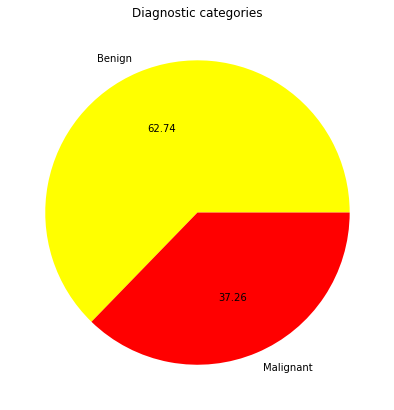

In [150]:
#Visual represenrtation of diagnostic categories
labels = ['Benign','Malignant']
pie_data = data["diagnosis"].value_counts()
fig = plt.figure(figsize =(10, 7))
plt.title("Diagnostic categories")
plt.pie(pie_data,labels= labels,autopct='%.2f',colors= ('yellow', 'red'));


In [66]:
#Checking for null values in the dataset
data.isnull().sum(axis = 0)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [36]:
#Remove unwanted colums from dataset
data = data.drop(['id','Unnamed: 32'], axis=1)

#Divide dataset into X and Y
X = data.drop(['diagnosis'],axis=1)

Y = data['diagnosis']
Y= Y.apply(lambda x: 1 if x == "M" else 0)


In [24]:
#Divide into test train data set
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size = .2,random_state = 0)

In [37]:
print('train set: ', x_train.shape,y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

train set:  (455, 30) (455,)
test set:  (114, 30) (114,)


# Model(s) generation

## Gradient boosting with XGBoost

In [204]:
#Using grid search algorithm find the best parameters for gradient boosting model 
grid_params={'n_estimators': [100,200,300,400,50],
            'learning_rate': [0.010,0.001,0.0001,1],
            'max_depth':[5,6,4,7],
            'eval_metric':['logloss']}
grid_model=GridSearchCV(estimator=XGBClassifier(),param_grid=grid_params,cv=3)
grid_model.fit(x_train,y_train)
grid_model.best_params_

{'eval_metric': 'logloss',
 'learning_rate': 1,
 'max_depth': 5,
 'n_estimators': 100}

In [205]:
xgb =XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators=100,eval_metric ='logloss')
xgb.fit(x_train,y_train)
y_pred_xgb =xgb.predict(x_test)
error_xgb=np.sqrt(mean_squared_error(y_pred_xgb,y_test))
print('Error of the optimized XGBClassifier model: ', str(error_xgb))

Error of the optimized XGBClassifier model:  0.16222142113076254


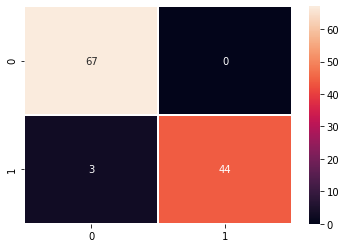

In [206]:
cm_xgb = confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(cm_xgb, linewidth=0.5,annot=True)

In [207]:
total_xgb=sum(sum(cm_xgb))
#Accuracy calculation from confusion matrix
accuracy_xgb=(cm_xgb[0,0]+cm_xgb[1,1])/total1
print ('Accuracy : ', accuracy_xgb)

sensitivity_xgb = cm_xgb[0,0]/(cm_xgb[0,0]+cm_xgb[0,1])
print('Sensitivity : ', sensitivity_xgb )

specificity_xgb = cm_xgb[1,1]/(cm_xgb[1,0]+cm_xgb[1,1])
print('Specificity : ', specificity_xgb)

Accuracy :  0.9736842105263158
Sensitivity :  1.0
Specificity :  0.9361702127659575


## Logistic regression

In [41]:
#Build the model

lr = LogisticRegression(solver='lbfgs', max_iter=1000)

In [42]:
#Fit the train values to model 
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [43]:
#predict values for new model
y_predict_lr = lr.predict(x_test)

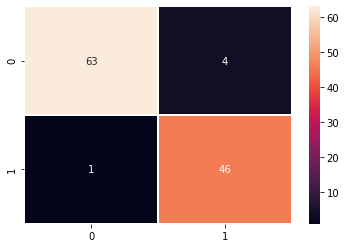

In [78]:
cm_lr = confusion_matrix(y_test,y_predict_lr)
sns.heatmap(cm_lr, linewidth=0.5,annot=True)

In [45]:
#Validation test score
error_lr = np.sqrt(mean_squared_error(y_predict_lr,y_test))
print('Error of the optimized Logistic Regression model: ', str(error_lr))

Error of the optimized Logistic Regression model:  0.20942695414584775


In [88]:
total_lr=sum(sum(cm_lr))
#Accuracy calculation from confusion matrix
accuracy_lr=(cm_lr[0,0]+cm_lr[1,1])/total_lr
print ('Accuracy : ', accuracy_lr)

sensitivity_lr = cm_lr[0,0]/(cm_lr[0,0]+cm_lr[0,1])
print('Sensitivity : ', sensitivity_lr )

specificity_lr = cm_lr[1,1]/(cm_lr[1,0]+cm_lr[1,1])
print('Specificity : ', specificity_lr)

Accuracy :  0.956140350877193
Sensitivity :  0.9402985074626866
Specificity :  0.9787234042553191


## Random forest

In [46]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(x_train, y_train)

y_pred_rf = random_forest.predict(x_test)

#Validation test score
error_rf = np.sqrt(mean_squared_error(y_pred_rf,y_test))
print('Error of the optimized Logistic Regression model: ', str(error_rf))

Error of the optimized Logistic Regression model:  0.20942695414584775


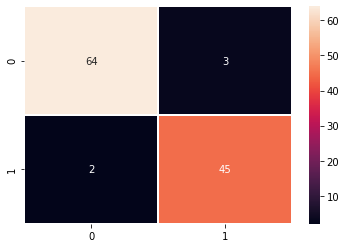

In [79]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm_rf, linewidth=0.5,annot=True)

In [89]:
total_rf=sum(sum(cm_rf))
#Accuracy calculation from confusion matrix
accuracy_rf=(cm_rf[0,0]+cm_rf[1,1])/total_rf
print ('Accuracy : ', accuracy_rf)

sensitivity_rf = cm_rf[0,0]/(cm_rf[0,0]+cm_rf[0,1])
print('Sensitivity : ', sensitivity_rf )

specificity_rf = cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])
print('Specificity : ', specificity_rf)

Accuracy :  0.956140350877193
Sensitivity :  0.9552238805970149
Specificity :  0.9574468085106383


## Support vector machines 

In [48]:
svc = SVC(kernel = 'linear')
svc.fit(x_train, y_train)

y_pred_svc = svc.predict(x_test)

#Validation test score
error_svm = np.sqrt(mean_squared_error(y_pred_svc,y_test))
print('Error of the optimized Logistic Regression model: ', str(error_svm))

Error of the optimized Logistic Regression model:  0.20942695414584775


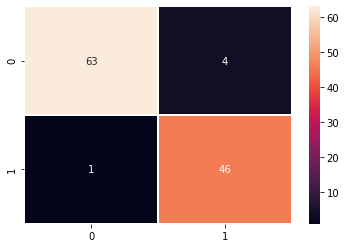

In [80]:
cm_svc = confusion_matrix(y_test,y_pred_svc)
sns.heatmap(cm_svc, linewidth=0.5,annot=True)

In [90]:
total_svc = sum(sum(cm_svc))
#Accuracy calculation from confusion matrix
accuracy_svc=(cm_svc[0,0]+cm_svc[1,1])/total_svc
print ('Accuracy : ', accuracy_svc)

sensitivity_svc = cm_svc[0,0]/(cm_svc[0,0]+cm_svc[0,1])
print('Sensitivity : ', sensitivity_svc )

specificity_svc = cm_svc[1,1]/(cm_svc[1,0]+cm_svc[1,1])
print('Specificity : ', specificity_svc)

Accuracy :  0.956140350877193
Sensitivity :  0.9402985074626866
Specificity :  0.9787234042553191


## 5-Fold cross validation

In [50]:
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

accuracy of each fold - [0.8936170212765957, 0.9680851063829787, 0.9574468085106383, 0.967741935483871, 0.946236559139785]
average accuracy score - 0.9466254861587737


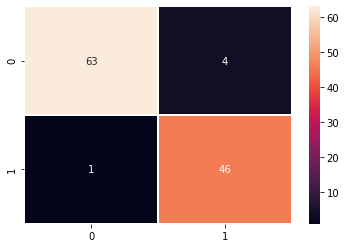

In [91]:
acc_score = []
 
for train_index , test_index in kf.split(train_data):
    x_train_k , x_test_k = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train_k , y_test_k = Y[train_index] , Y[test_index]
     
    model.fit(x_train_k,y_train_k)
    pred_values = model.predict(x_test_k)
     
    acc = accuracy_score(pred_values , y_test_k)
    acc_score.append(acc)
    cm_kfold = confusion_matrix(y_test_k, pred_values)
average_acc_score = sum(acc_score )/ k  

print('accuracy of each fold - {}'.format(acc_score))
print('average accuracy score - {}'.format(average_acc_score))
cm_kfold = confusion_matrix(y_test,y_pred_svc)
sns.heatmap(cm_kfold , linewidth=0.5,annot=True)

In [92]:
total_kfold = sum(sum(cm_svc))
#Accuracy calculation from confusion matrix
accuracy_kfold=(cm_kfold[0,0]+cm_kfold[1,1])/total_kfold
print ('Accuracy : ', accuracy_kfold)

sensitivity_kfold = cm_kfold[0,0]/(cm_kfold[0,0]+cm_kfold[0,1])
print('Sensitivity : ', sensitivity_kfold )

specificity_kfold = cm_kfold[1,1]/(cm_kfold[1,0]+cm_kfold[1,1])
print('Specificity : ', specificity_kfold)

Accuracy :  0.956140350877193
Sensitivity :  0.9402985074626866
Specificity :  0.9787234042553191


## Multilayer perceptron

In [25]:
model = Sequential()
model.add(Input(shape= (30,)))
model.add(Dense(150, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(110, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(1,  activation ='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               4650      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               60400     
_________________________________________________________________
dense_2 (Dense)              (None, 110)               44110     
_________________________________________________________________
dense_3 (Dense)              (None, 60)                6660      
_________________________________________________________________
dense_4 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 61        
Total params: 119,541
Trainable params: 119,541
Non-trainable params: 0
__________________________________________________

In [26]:
#model compilation 
model.compile(optimizer=SGD(lr=0.01, clipvalue=0.5),loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
#fit the model
r = model.fit(X_train,Y_train,epochs= 65,verbose = 1,validation_data = (X_test,Y_test))

Epoch 1/65
15/15 [==============================] - 0s 20ms/step - loss: 11.7010 - accuracy: 0.4879 - val_loss: 2.8991 - val_accuracy: 0.5877
Epoch 2/65
15/15 [==============================] - 0s 4ms/step - loss: 1.8569 - accuracy: 0.5780 - val_loss: 1.9236 - val_accuracy: 0.5965
Epoch 3/65
15/15 [==============================] - 0s 4ms/step - loss: 1.3345 - accuracy: 0.5407 - val_loss: 1.7913 - val_accuracy: 0.5877
Epoch 4/65
15/15 [==============================] - 0s 6ms/step - loss: 1.1156 - accuracy: 0.6088 - val_loss: 0.9632 - val_accuracy: 0.4561
Epoch 5/65
15/15 [==============================] - 0s 5ms/step - loss: 0.8089 - accuracy: 0.6198 - val_loss: 0.5580 - val_accuracy: 0.7982
Epoch 6/65
15/15 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.7824 - val_loss: 0.5424 - val_accuracy: 0.6228
Epoch 7/65
15/15 [==============================] - 0s 6ms/step - loss: 0.5251 - accuracy: 0.7670 - val_loss: 0.4005 - val_accuracy: 0.8596
Epoch 8/65
15/15 [

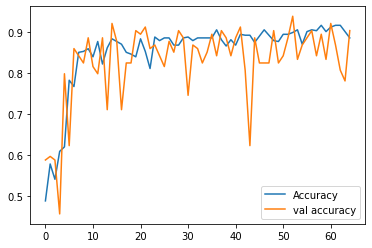

In [28]:
#plot the loss per iteration
plt.plot(r.history['accuracy'], label ="Accuracy")
plt.plot(r.history['val_accuracy'], label = "val accuracy")
plt.legend()

In [31]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.2476 - accuracy: 0.9035


[0.2476106584072113, 0.9035087823867798]

In [86]:
y_pred_mlp = model.predict(x_test)
y_pred_mlp = np.around(preds)
acc_test = accuracy_score(y_test, y_pred_mlp)

print ('The accuracy on test data is %s' % (round(acc_test,2)))

The accuracy on test data is 0.9


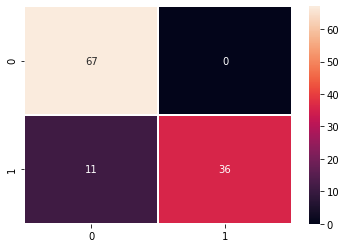

In [95]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp , linewidth=0.5,annot=True)

In [96]:
total_mlp = sum(sum(cm_mlp))
#Accuracy calculation from confusion matrix
accuracy_mlp =(cm_mlp[0,0]+cm_mlp[1,1])/total_mlp
print ('Accuracy : ', accuracy_mlp)

sensitivity_mlp = cm_mlp[0,0]/(cm_mlp[0,0]+cm_mlp[0,1])
print('Sensitivity : ', sensitivity_mlp )

specificity_mlp = cm_mlp[1,1]/(cm_mlp[1,0]+cm_mlp[1,1])
print('Specificity : ', specificity_mlp)

Accuracy :  0.9035087719298246
Sensitivity :  1.0
Specificity :  0.7659574468085106


#  Model evaluation 

In [129]:
# print the results 
print()
print()
print('        ','XGBoost ',   'Logistic regression  ', 'Random Forest  ', 'Support Vector ', '    MLP   ')
print('        ','---------', '----------------------','-----------------','---------------','----------')

print('Accuracy    ',
      round(accuracy_xgb, 4), '        ',
      round(accuracy_lr, 4), '        ',
      round(accuracy_rf, 4), '        ',
      round(accuracy_svc, 4), '        ',
      round(accuracy_mlp, 4)
     )
print('Sensitivity ',
      round(sensitivity_xgb, 4), '           ',
      round(sensitivity_lr, 4), '        ',
      round(sensitivity_rf, 4), '        ',
      round(sensitivity_svc, 4), '        ',
      round(sensitivity_mlp, 4)
     )
print('Specificity ',
      round(specificity_xgb, 4), '        ',
      round(specificity_lr, 4), '        ',
      round(specificity_rf, 4), '        ',
      round(specificity_svc, 4), '        ',
      round(specificity_mlp, 4)
     )



         XGBoost  Logistic regression   Random Forest   Support Vector      MLP   
         --------- ---------------------- ----------------- --------------- ----------
Accuracy     0.9737          0.9561          0.9561          0.9561          0.9035
Sensitivity  1.0             0.9403          0.9552          0.9403          1.0
Specificity  0.9362          0.9787          0.9574          0.9787          0.766


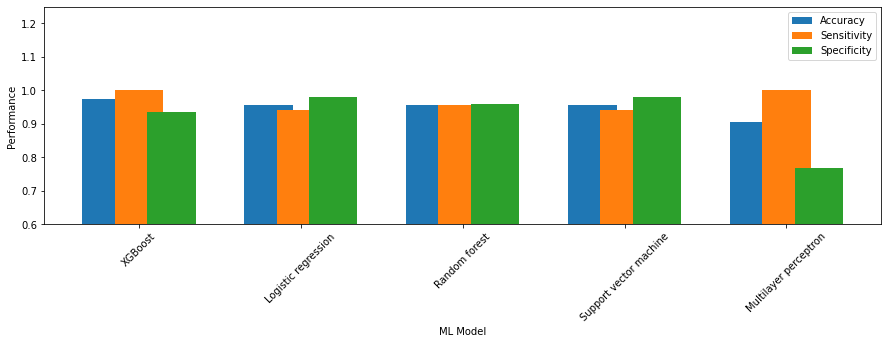

In [201]:
#Comparitive visualization of ML models 
x = ['XGBoost','Logistic regression','Random forest','Support vector machine','Multilayer perceptron']
acc = [accuracy_xgb,accuracy_lr,accuracy_rf,accuracy_svc,accuracy_mlp]
sen = [sensitivity_xgb,sensitivity_lr,sensitivity_rf,sensitivity_svc,sensitivity_mlp]
spe = [specificity_xgb,specificity_lr,specificity_rf,specificity_svc,specificity_mlp]

fig = plt.figure(figsize =(15,4))
w = 0.2
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

plt.ylim(0.6,1.25)
plt.xticks(rotation=45)

plt.bar(bar1,acc,0.3,label = 'Accuracy')
plt.bar(bar2,sen,0.3,label = 'Sensitivity')
plt.bar(bar3,spe,0.3,label = 'Specificity')
plt.xticks([r + w for r in range(len(x))],x)

plt.xlabel("ML Model")
plt.ylabel("Performance")
plt.legend();

# Limitation
The models were trained and validated based on data from the UCI machine learning repository website. However due to the unavailability of the actual clinical diagnosis data, we dont know the acatuall accuracy of these predictions by the ML models.

# Conclusion 

In this notebook, I trained ML models using XGBoost,logistic regression,random forest,support vector machines, and multilayer perceptron  algorithms for breast cancer prediction. The aim was to compare the accuracies,sensitivity and specificity of the models.
The proposed models performed well on tha data set and predicted new values with a high accuracy rate. Overall, XGBoost model out performed the other models.
